<a href="https://colab.research.google.com/github/LNA-OU/CodeStore/blob/main/Projet_stage_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importation des librairies

In [14]:
import bs4
from requests import get 
from bs4 import BeautifulSoup
import pandas as pd
from time import sleep
from random import randint
from time import time
from IPython import display
from warnings import warn
import numpy as np
from dataclasses import replace
import matplotlib.pyplot as plt

#Varier les valeurs de deux paramètres de l'URL : le paramètre *release_date* et *page*
- Créez une liste appelée *pages* et remplissez-la avec les chaînes correspondant au titre entre 51 et 201 pour chaque annnée. 

In [31]:
headers = {"Accept-Language": "en-US, en;q=0.5"}
pages = [str(i) for i in range(51,201)]

#Creation des tables afin de stocker les données

In [32]:
names = []
years = []
genres = []
imdb_ratings = []
metascores = []
votes = []

#Initialisation des variables: time et requests

In [33]:
start_time = time()
requests = 0

#Importer tous les 50 conteneurs de films à partir de chaque page

In [34]:
#for year_url in years_url:

  # Pour chaque page dans l'interval 1-6
for page in pages:

      # Faire un get request
      response = get('https://www.imdb.com/search/title?release_date=2000-01-01,2021-12-31&sort=num_votes,desc&page=' + page, headers = headers)

      # Pause de boucle entre l'inteval de la 8éme page et la 15éme page
      sleep(randint(8,15))

      # Surveiller les requests
      requests += 1
      elapsed_time = time() - start_time
      print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
      display.clear_output(wait=True)
      
      # utilisez la fonction warn() du module warnings pour lancer un avertissement si le code d'état n'est pas 200
      
      # Lancer un avertissement pour les codes d'état non-200

      if response.status_code != 200:
          warn('Request: {}; Status code: {}'.format(requests, response.status_code))

      # Rompre la boucle si le nombre de requêtes est supérieur à celui attendu
      
      if requests > 100:
          warn('Number of requests was greater than expected.')
          break

      # Analyser le contenu de la demande avec BeautifulSoup

      page_html = BeautifulSoup(response.text, 'html.parser')

      # Sélectionnez tous les 50 conteneurs de films à partir d'une seule page

      mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')
      for container in mv_containers:

          # Si le film a un Metascore, alors (car il y a des films n'ont pas de Metascore) :

          if container.find('div', class_ = 'ratings-metascore') is not None:

              # Scrape the name
              name = container.h3.a.text
              names.append(name)

              # Scrape the year
              year = container.h3.find('span', class_ = 'lister-item-year').text.replace('(','').replace(')','').replace('– )','').replace('I ','')
              years.append(year)

              # Scrape the genre
              genre= container.p.find('span', class_ = 'genre').text.replace('\n', '')
              genres.append(genre)

              # Scrape the IMDB rating
              imdb = float(container.strong.text)
              imdb_ratings.append(imdb)

              # Scrape the Metascore
              m_score = container.find('span', class_ = 'metascore').text
              metascores.append(int(m_score))

              # Scrape the number of votes
              vote = container.find('span', attrs = {'name':'nv'})['data-value']
              votes.append(int(vote))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: Number of requests was greater than expected.


#Creation de Dataframe

In [35]:
movie_ratings = pd.DataFrame({
'movie': names,
'year': years,
'genre': genres,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})

#Resultats des films

In [36]:
print(movie_ratings)

                                                  movie  year  \
0                                       The Dark Knight  2008   
1                                             Inception  2010   
2     The Lord of the Rings: The Fellowship of the Ring  2001   
3         The Lord of the Rings: The Return of the King  2003   
4                                          Interstellar  2014   
...                                                 ...   ...   
4495                                             Snatch  2000   
4496                                Slumdog Millionaire  2008   
4497                            Avengers: Age of Ultron  2015   
4498                                   The Intouchables  2011   
4499                                        The Martian  2015   

                                      genre  imdb  metascore    votes  
0          Action, Crime, Drama               9.0         84  2556712  
1     Action, Adventure, Sci-Fi               8.8         74  2269530  
2  

#Afficher les 5 premiers films de Dataframe

In [37]:
movie_ratings = movie_ratings[['movie', 'year', 'genre', 'imdb', 'metascore', 'votes']]
movie_ratings.head()

,movie,year,genre,imdb,metascore,votes
0,The Dark Knight,2008,"Action, Crime, Drama",9.0,84,2556712
1,Inception,2010,"Action, Adventure, Sci-Fi",8.8,74,2269530
2,The Lord of the Rings: The Fellowship of the Ring,2001,"Action, Adventure, Drama",8.8,92,1798627
3,The Lord of the Rings: The Return of the King,2003,"Action, Adventure, Drama",9.0,94,1777343
4,Interstellar,2014,"Adventure, Drama, Sci-Fi",8.6,74,1729679


#Vérifier les valeurs minimales et maximales de chaque type de notation

In [38]:
movie_ratings.describe().loc[['min', 'max'], ['imdb', 'metascore']]

,imdb,metascore
min,7.2,55.0
max,9.0,95.0


#Multiplier chaque note IMDB par 10
A partir des valeurs ci-dessus, les deux évaluations ont des échelles différentes. Pour pouvoir tracer les deux distributions sur un même graphe, il va falloir les ramener à la même échelle. Normalisons la colonne imdb sur une échelle de 100 points.

In [39]:
movie_ratings['n_imdb'] = movie_ratings['imdb'] * 10
movie_ratings.head(3)

,movie,year,genre,imdb,metascore,votes,n_imdb
0,The Dark Knight,2008,"Action, Crime, Drama",9.0,84,2556712,90.0
1,Inception,2010,"Action, Adventure, Sci-Fi",8.8,74,2269530,88.0
2,The Lord of the Rings: The Fellowship of the Ring,2001,"Action, Adventure, Drama",8.8,92,1798627,88.0


#Enregistrer l'ensemble de données sous fichier csv

In [40]:
movie_ratings.to_csv('movie_ratings.csv', sep=";")

#Tracer et analyser les distributions
Dans la cellule de code suivante, nous :

Importez le sous-module matplotlib.pyplot.
- Exécutez Jupyter magic *%matplotlib* pour activer le mode matplotlib de Jupyter et ajoutez en ligne pour que nos graphiques s'affichent dans le cahier.
- Créez un objet figure avec 3 axes.
- Tracez la distribution de chaque note non normalisée sur un axe individuel.
- Tracez les distributions normalisées des deux cotes sur le même axe.
- Cachez les épines supérieure et droite des trois axes.

No handles with labels found to put in legend.


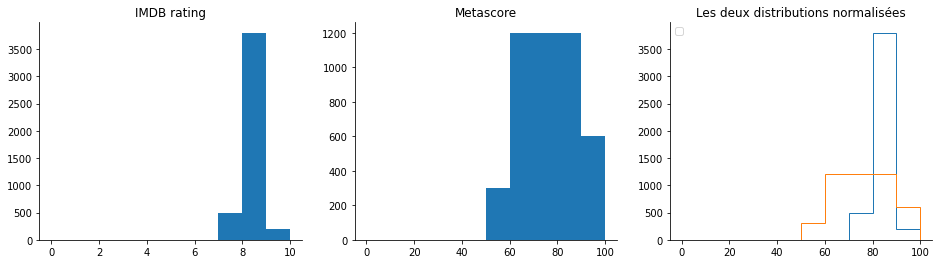

In [41]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes
ax1.hist(movie_ratings['imdb'], bins = 10, range = (0,10)) # bin range = 1
ax1.set_title('IMDB rating')
ax2.hist(movie_ratings['metascore'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')
ax3.hist(movie_ratings['n_imdb'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(movie_ratings['metascore'], bins = 10, range = (0,100), histtype = 'step')
ax3.legend(loc = 'upper left')
ax3.set_title('Les deux distributions normalisées')
for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()